# Case Office X

A company is looking to expand to a new location inside the EU. This report is made for helping business owners with data-driven decision making.

##### Architecture picture that describes the solution, tech choices and the data flow:

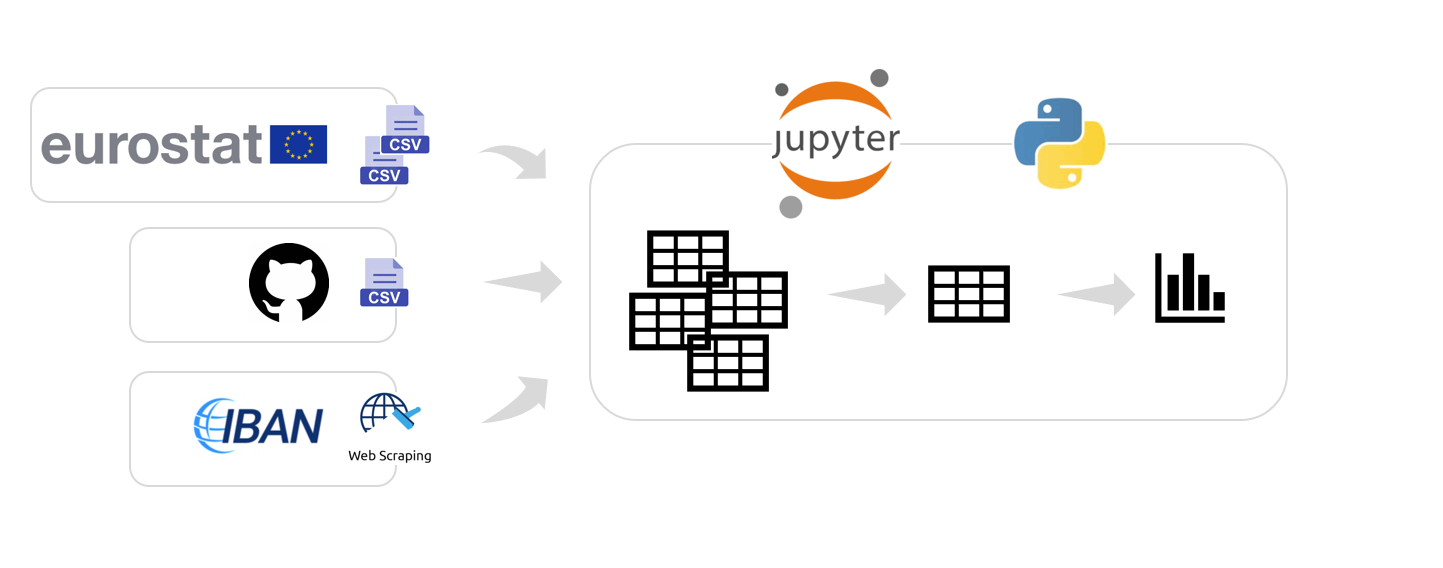

### Extract & Transform

In [53]:
# Import all the necessary libraries for data extraction, transformation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Define parameters for the analysis

# Countries that are not relevant for the analysis
drop_countries = ['Finland','Germany','Sweden','United Kingdom']

# Timeframe
min_date = 2014
max_date = 2019

In [55]:
# Fetch GDP data from GitHub  

url_gdp = 'https://gist.githubusercontent.com/aleksiro/ed085c4a29b610e7d0b01f345f093552/raw/c83254d3e55e531a2ef5de1267b21bc2575fdc71/gdp_data.csv'
df_gdp_raw = pd.read_csv(url_gdp, sep = '|')

# Unpivot columns
df_gdp = pd.melt(df_gdp_raw, id_vars = 'Country', value_vars = ['2008','2012','2014','2016','2018','2019'], var_name = 'Year', value_name = 'GDP')

# Drop current locations
df_gdp = df_gdp[~df_gdp['Country'].isin(drop_countries)]

# Change data types
df_gdp['GDP'] = df_gdp['GDP'].str.replace(',', '.', regex = True)
df_gdp[['GDP','Year']] = df_gdp[['GDP','Year']].apply(pd.to_numeric)

# Filter data based on the min and max dates defined earlier
df_gdp = df_gdp.loc[~((df_gdp['Year'] < min_date) | (df_gdp['Year'] > max_date))]

df_gdp

,Country,Year,GDP
58,Austria,2014,333.146
59,Belgium,2014,403.003
60,Bosnia and Herzegovina,2014,18.560
61,Bulgaria,2014,NaN
62,Croatia,2014,43.401
...,...,...,...
167,Romania,2019,223.337
168,Serbia,2019,51.410
169,Slovakia,2019,93.865
170,Slovenia,2019,48.392


In [56]:
# Amount of cloud services used in country’s enterprises

url_cloud = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/ISOC_CICCE_USE$DEFAULTVIEW/A.GE10.C10-S951_X_K.E_CC.PC_ENT.EU27_2020+EU28+EU27_2007+EU15+EA+BE+BG+CZ+DK+DE+EE+IE+EL+ES+FR+HR+IT+CY+LV+LT+LU+HU+MT+NL+AT+PL+PT+RO+SI+SK+FI+SE+IS+NO+UK+ME+MK+AL+RS+TR+BA/?format=SDMX-CSV&startPeriod=2014&endPeriod=2021'
df_cloud_raw = pd.read_csv(url_cloud, sep = ',')

df_cloud_raw['Cloud'] = df_cloud_raw['OBS_VALUE'] * 0.01
df_cloud = df_cloud_raw[['geo','TIME_PERIOD','Cloud']]

# Rename columns
df_cloud.columns = ['Geo', 'Year', 'Cloud']

# Filter data based on the min and max dates defined earlier
df_cloud = df_cloud.loc[~((df_cloud['Year'] < min_date) | (df_cloud['Year'] > max_date))]

df_cloud

,Geo,Year,Cloud
1,AT,2014,0.117
2,AT,2016,0.170
3,AT,2017,0.210
4,AT,2018,0.233
7,BA,2018,0.083
...,...,...,...
214,TR,2016,0.103
215,TR,2018,0.101
218,UK,2014,0.240
219,UK,2016,0.347


In [57]:
# Size of ICT sector in the country

url_ict = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/TIN00074/A.ICT.EU27_2020+EU28+EA19+BE+BG+CZ+DK+DE+EE+IE+EL+ES+FR+HR+IT+CY+LV+LT+LU+HU+MT+NL+AT+PL+PT+RO+SI+SK+FI+SE+IS+LI+NO+CH+UK+ME+MK+AL+RS+TR+BA/?format=SDMX-CSV&startPeriod=2008&endPeriod=2019'
df_ict_raw = pd.read_csv(url_ict, sep = ',')

df_ict_raw['ICT'] = df_ict_raw['OBS_VALUE'] * 0.01
df_ict = df_ict_raw[['geo','TIME_PERIOD','ICT']]

# Rename columns
df_ict.columns = ['Geo', 'Year', 'ICT']

# Filter data based on the min and max dates defined earlier
df_ict = df_ict.loc[~((df_ict['Year'] < min_date) | (df_ict['Year'] > max_date))]

df_ict

,Geo,Year,ICT
6,AT,2014,NaN
7,AT,2015,0.0337
8,AT,2016,0.0346
9,AT,2017,0.0349
10,AT,2018,0.0358
...,...,...,...
372,UK,2014,0.0567
373,UK,2015,0.0581
374,UK,2016,0.0587
375,UK,2017,0.0597


In [58]:
# Scrape a list of all country ISO codes

df_codes_raw = pd.read_html('https://www.iban.com/country-codes')
df_codes = df_codes_raw[0]
df_codes = df_codes[['Country', 'Alpha-2 code']]

df_codes

,Country,Alpha-2 code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


In [59]:
# Merge two digit country codes into df_gdp

df_gdp = pd.merge(df_gdp, df_codes, on = 'Country', how = 'left')
df_gdp.rename(columns = {'Alpha-2 code':'Geo'}, inplace = True)

df_gdp

,Country,Year,GDP,Geo
0,Austria,2014,333.146,AT
1,Belgium,2014,403.003,BE
2,Bosnia and Herzegovina,2014,18.560,BA
3,Bulgaria,2014,NaN,BG
4,Croatia,2014,43.401,HR
...,...,...,...,...
95,Romania,2019,223.337,RO
96,Serbia,2019,51.410,RS
97,Slovakia,2019,93.865,SK
98,Slovenia,2019,48.392,SI


In [60]:
# Check if any empty values

df_gdp[df_gdp['Geo'].isna()]

,Country,Year,GDP,Geo
16,Netherlands,2014,671.560,NaN
17,North Macedonia,2014,12.200,NaN
41,Netherlands,2016,708.337,NaN
42,North Macedonia,2016,13.800,NaN
66,Netherlands,2018,774.039,NaN
67,North Macedonia,2018,NaN,NaN
91,Netherlands,2019,810.247,NaN
92,North Macedonia,2019,NaN,NaN


In [61]:
# Some manual fixing due to spelling differences (Republic of North Macedonia / Netherlands (the))

rows_nl = (df_gdp.Country == 'Netherlands')
rows_nm = (df_gdp.Country == 'North Macedonia')

df_gdp.loc [rows_nl, 'Geo'] = 'NL'
df_gdp.loc [rows_nm, 'Geo'] = 'MK'

df_gdp[df_gdp['Geo'].isna()]

,Country,Year,GDP,Geo


In [62]:
# Create dataframe of all data

df = pd.merge(df_gdp, df_ict, on = ['Geo','Year'], how = 'left')
df = pd.merge(df, df_cloud, on = ['Geo','Year'], how = 'left')

# Change column order
df = df[['Country','Geo','Year','GDP','ICT','Cloud']]

df

,Country,Geo,Year,GDP,ICT,Cloud
0,Austria,AT,2014,333.146,NaN,0.117
1,Belgium,BE,2014,403.003,0.0382,0.212
2,Bosnia and Herzegovina,BA,2014,18.560,0.0498,NaN
3,Bulgaria,BG,2014,NaN,0.0488,0.077
4,Croatia,HR,2014,43.401,0.0402,0.222
...,...,...,...,...,...,...
95,Romania,RO,2019,223.337,0.0374,NaN
96,Serbia,RS,2019,51.410,0.0492,NaN
97,Slovakia,SK,2019,93.865,0.0431,NaN
98,Slovenia,SI,2019,48.392,0.0371,NaN


In [63]:
# Check if any duplicates

df.duplicated(subset = ['Country','Year']).any() #False

False

In [66]:
# Add calculated columns for measuring attractiveness of the countries

df['Attractiveness'] = df['GDP'] * df['ICT'] * df['Cloud']

# Drop empty values 
df = df[df['Attractiveness'].notna()]

# Add some columns for comparison
df['ICT_median'] = df['ICT'].median()
df['Cloud_median'] = df['Cloud'].median()

print(df.head())

   Country Geo  Year       GDP     ICT  Cloud  Attractiveness  ICT_median  \
1  Belgium  BE  2014   403.003  0.0382  0.212        3.263679     0.04075   
4  Croatia  HR  2014    43.401  0.0402  0.222        0.387328     0.04075   
5  Czechia  CZ  2014   156.660  0.0427  0.151        1.010097     0.04075   
7  Estonia  EE  2014    20.180  0.0483  0.149        0.145229     0.04075   
8   France  FR  2014  2149.770  0.0383  0.119        9.798007     0.04075   

   Cloud_median  
1        0.1725  
4        0.1725  
5        0.1725  
7        0.1725  
8        0.1725  


## Analysis

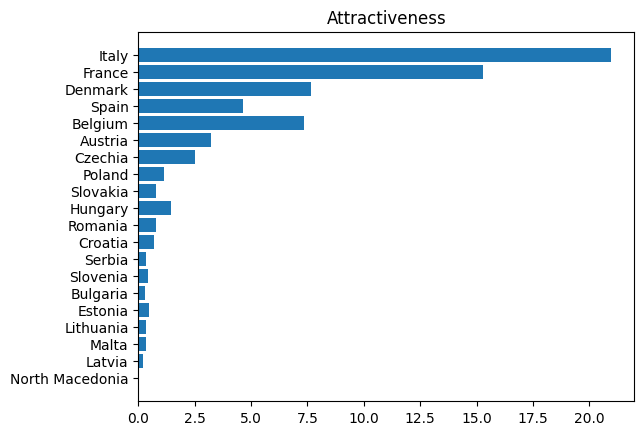

In [67]:
# Get results for the latest year in data

df_sorted = df.sort_values('Attractiveness')

x = df_sorted['Country']
y = df_sorted['Attractiveness']

plt.barh(x, y, data = df_sorted)
plt.title("Attractiveness")

plt.show()

In [68]:
country = input('Set a country for further analysis: ')

Set a country for further analysis: Italy


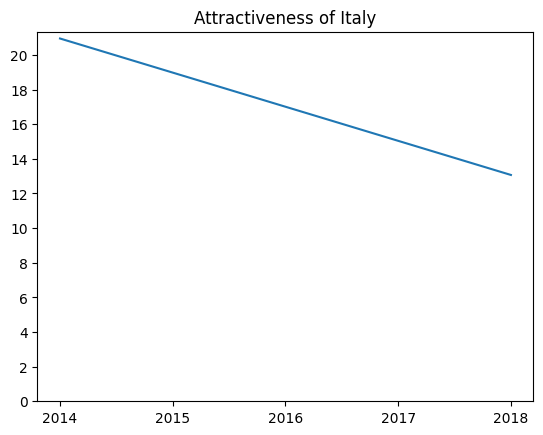

In [69]:
df_country = df[df['Country'] == country]

if len(df_country.index) > 1:

    max_value = df_country['Attractiveness'].max()

    x = df_country['Year']
    y = df_country['Attractiveness']

    plt.plot(x, y)

    xticks_list = np.arange(min_date, max_date, 1)
    plt.xticks(xticks_list)

    yticks_list = np.arange(0, max_value, 2)
    plt.yticks(yticks_list)

    plt.title("Attractiveness of " + country)

    plt.show()
    
elif len(df_country.index) == 1:
    print('Only one row in the dataset','\n')
    print(df_country)
    
else:
    print('No data for this country') 

In [70]:
# See data for the country

df_country

,Country,Geo,Year,GDP,ICT,Cloud,Attractiveness,ICT_median,Cloud_median
12,Italy,IT,2014,1627.41,0.0321,0.401,20.948184,0.04075,0.1725
62,Italy,IT,2018,1765.42,0.0329,0.225,13.068522,0.04075,0.1725


## Key Results

Four most attractive locations for the planned expansion:

#### Italy
Although the 'attractiveness level' of Italy is very high, the usage of cloud services is actually decreasing, and this should be taken in consideration

#### France
GDP is high, but France is a little bit behind when it comes to usage of modern technologies - both cloud services and percentage of ICT are below the median

#### Denmark
Usage of the cloud services is very high, and that's why Denmark could be a very potential, even though it's a relatively small country

#### Belgium
Belgium is a solid country with high GDP and increasing usage of cloud services

##### Before making the final decision, we should definitely collect more data to get deeper insights. In SQL data warehouse, querying data, parsing empty values and joining data is efficient, and with Power BI one can easily create advanced analytics such as anticipations for the future.

## Sketch for the production solution on Azure

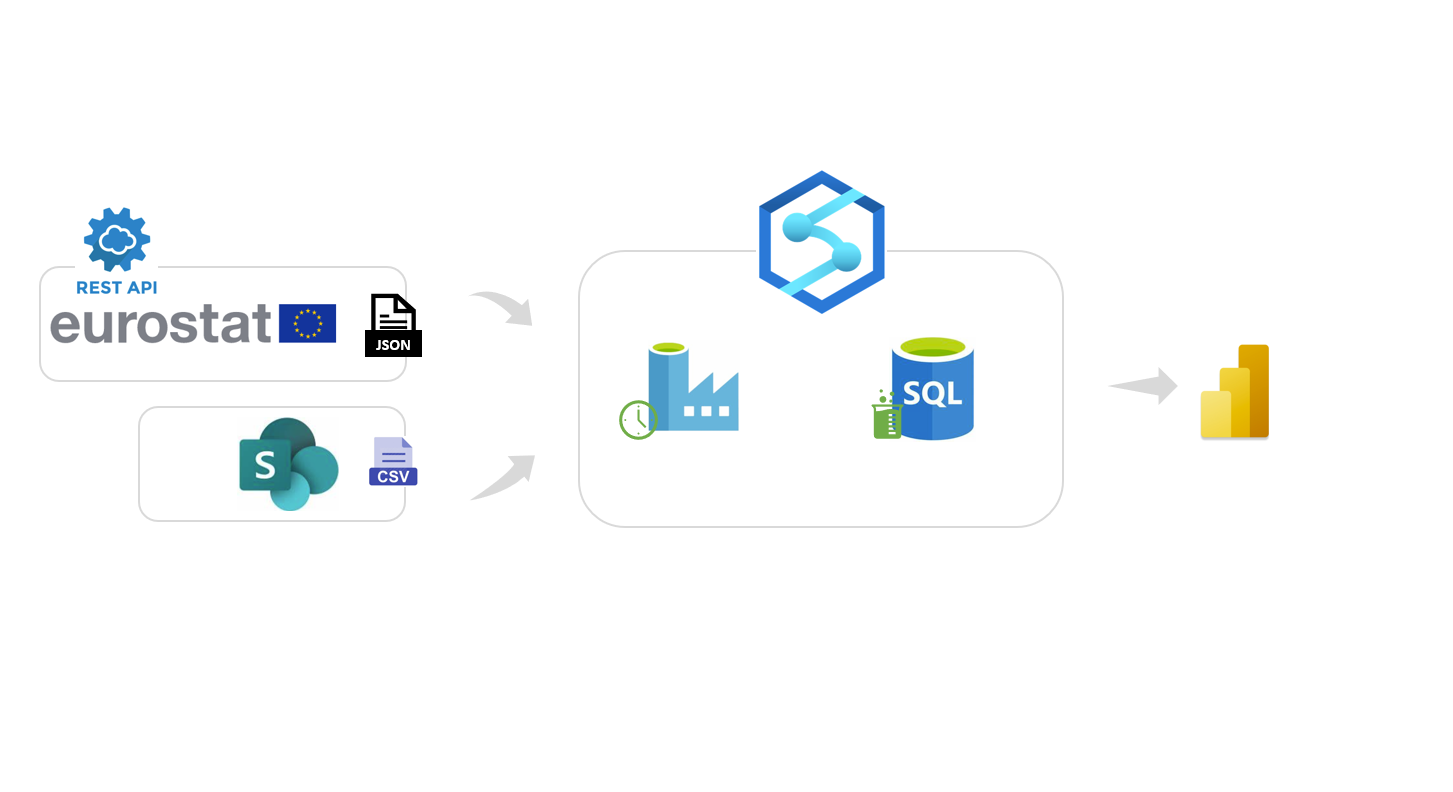

## Thank you!